In [ ]:
# I chose the Multinomial Naive Bayes classifier for its simplicity and efficiency in handling text 
# classification tasks. Naive Bayes is particularly well-suited for natural language processing tasks, 
# especially when dealing with a large number of features such as words in text. It assumes independence 
# between features, making it computationally efficient and requiring fewer parameters to estimate.

# For feature representation, I opted for TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization. 
# TF-IDF is a widely used technique in text mining and information retrieval. It transforms the text data into 
# numerical vectors, capturing the importance of words in the documents relative to the entire dataset. TF-IDF 
# takes into account the frequency of a word in a specific document (question pair) and its rarity across all 
# documents, assigning higher weights to terms that are more discriminative.

# The pre-processing steps, including converting text to lowercase, removing special characters, URLs, 
# and punctuations while retaining stop words, were chosen to clean the text data and focus on essential 
# information. These steps aim to reduce noise and improve the performance of the Naive Bayes model.

Accuracy: 72.57%
Precision: 0.76
Recall: 0.39
F1 Score: 0.52

Confusion Matrix:
[[17362  1382]
 [ 6848  4408]]


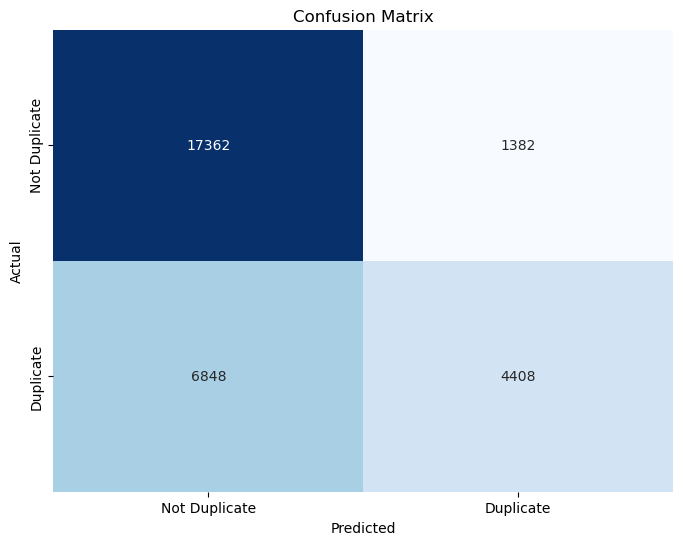

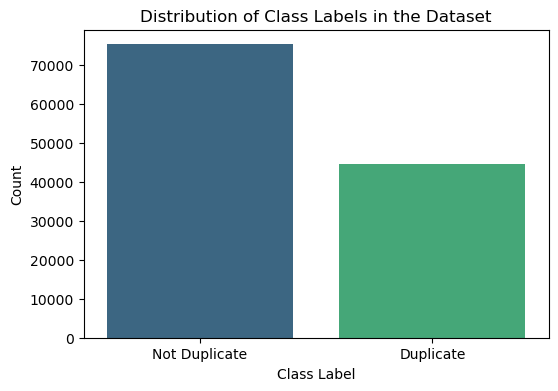

In [3]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower() # converting to lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text) # remove special characters, links, hashtags, punctuations, and numerics
        text = re.sub(r'http\S+', '', text) # remove URLs
        text = text.translate(str.maketrans("", "", string.punctuation)) # remove punctuation
        text = re.sub(r'\d+', '', text) # removing numerics
    return text

data_train = pd.read_csv('train.csv')

data_train_subset = data_train.head(120000) # first 120k questions

# concatenate question1 and question2 to create features
X = data_train_subset['question1'] + ' ' + data_train_subset['question2'] # extracting features and labels
y = data_train_subset['is_duplicate']

X = X.apply(preprocess_text) # pre-processing the text

# splitting the data into training and testing sets (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = X_train.fillna('') # filling missing values with an empty string

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# training a Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Explanation: I chose the Multinomial Naive Bayes model for its simplicity and efficiency in handling text data.
# However, it makes simplifying assumptions, such as feature independence and equal importance of all features,
# which might not hold true in real-world data with complex relationships. The model's inability to capture intricate
# dependencies within the data may limit its performance, especially in tasks where nuanced context is crucial.

# making predictions on the test set
y_pred = naive_bayes_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Explanation: The evaluation metrics above (accuracy, precision, recall & F1 score) provide insights into the model's performance.
# To better understand the model's effectiveness, it's helpful to compare these metrics with a baseline or random classifier.

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Explanation:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positives among instances predicted as positive. It measures the model's ability to
#   avoid false positives.
# - Recall: The proportion of true positives among actual positive instances. It measures the model's ability to capture
#   all positive instances.
# - F1 Score: The harmonic mean of precision and recall. It provides a balanced assessment, especially in imbalanced datasets,
#   as it considers both false positives and false negatives.

# creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# creating a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Duplicate', 'Duplicate'],
            yticklabels=['Not Duplicate', 'Duplicate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# visualizing the distribution of class labels in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='is_duplicate', data=data_train_subset, palette='viridis')
plt.title('Distribution of Class Labels in the Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Duplicate', 'Duplicate'])
plt.show()

In [ ]:
# In the heatmap, the diagonal elements represent correct predictions, and off-diagonal elements represent misclassifications.

# The accuracy of the model is about 73%, indicating the overall correctness of the predictions. 
# It suggests that the model is performing reasonably well on the given dataset.

# The model demonstrates a reasonable ability to identify non-duplicate pairs, as indicated by a high number of True Negatives. 
# However, there is room for improvement in correctly identifying duplicate pairs, as suggested by the lower number of True 
# Positives and the relatively low recall.